# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

# 📙Web Scraping Solution

## 🟠Step 1: Install dependencies as per requirements file

In [72]:
!python -m pip install -r ../requirements.txt

1553.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [73]:
#import os
#from bs4 import BeautifulSoup  # De la libreria bs4 (Nuevo nombere de la libreria) traeme la funcion BeautifulSoup
#import requests
#import time
#import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## 🟠Step 2: Download HTML
The download of the HTML of the web page will be done with the requests library, as we saw in the module theory.

The web page we want to scrape is the following: https://ycharts.com/companies/TSLA/revenues. It collects and stores information about the growth of the company every three months, since June 2009. It stores the text scraped from the web in some variable.

In [74]:
import os # Importo libreria necesaria

# Para evitar que la respuesta sea "403 Forbidden", intento con un User Anonimo. (If no information is extracted, then connect as anonymous).
# Para esto defino un User-Agent falso para que la solicitud parezca provenir de un navegador real, ya que
# los servidores bloquean a los bots, pero permiten navegadores con User-Agent válidos.

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}

# EXPLICACION DEL USER-AGENT

# 1. headers
#     headers es una variable que contiene un diccionario. En este caso, se usa para definir un conjunto de cabeceras HTTP (headers) que se enviarán junto con la solicitud HTTP.

# 2. ¿Qué son los "headers" en una solicitud HTTP?
#     Headers (cabeceras) son información adicional que se envía junto con una solicitud HTTP para proporcionar detalles sobre la solicitud o sobre el cliente que la está haciendo (por ejemplo, el navegador que estás usando).

# 3. El header User-Agent
#     En este caso, estás utilizando un header específico llamado User-Agent.
#     El User-Agent le dice al servidor qué tipo de cliente está haciendo la solicitud (por ejemplo, qué navegador web está usando).

# 4. El valor del User-Agent
#     El valor de este User-Agent es:
#     "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"
#     Este es un string largo que indica varias cosas sobre el navegador y el sistema operativo de la persona que está haciendo la solicitud. Aquí te desgloso cada parte:
#
#     Mozilla/5.0: 
#       Indica que el navegador es compatible con el estándar Mozilla (aunque ahora muchos navegadores usan este mismo formato, como Chrome y Safari). Esto es histórico y es parte del proceso de compatibilidad entre navegadores.
#     (Macintosh; Intel Mac OS X 10_11_5): 
#       Indica que el cliente está utilizando un sistema operativo Mac OS X en una máquina con un procesador Intel.
#     AppleWebKit/537.36: 
#       Esto hace referencia al motor de renderizado que utiliza el navegador. AppleWebKit es el motor que usa Safari y Chrome.
#     (KHTML, like Gecko): 
#       Es una declaración de compatibilidad con el motor de renderizado KHTML (usado en navegadores como Konqueror) y Gecko (usado en Firefox). Es una forma de asegurar que el servidor pueda interpretar correctamente las solicitudes de diferentes navegadores.
#     Chrome/50.0.2661.102: 
#       Informa que el navegador es Chrome versión 50.0.2661.102.
#     Safari/537.36: 
#       Esto indica que el navegador también es compatible con Safari, versión 537.36.

# 5. ¿Por qué usar un User-Agent falso?
#     Simular un navegador real: Algunos sitios web bloquean solicitudes automáticas (como las de bots o scripts) si detectan que vienen de una fuente que no parece un navegador estándar. Al configurar un User-Agent como el que has puesto, haces que tu solicitud parezca provenir de un navegador real (en este caso, un navegador Chrome en un Mac), lo que puede ayudar a evitar bloqueos por parte del servidor.

# 6. ¿Cómo se usa en el código?
#     Cuando usas este User-Agent en la solicitud, lo estás añadiendo a las cabeceras de la solicitud HTTP. Así, el servidor recibirá la solicitud con el mismo User-Agent que usaría un navegador real:
#       response = requests.get(url, headers=headers)
#     Aquí estás enviando el User-Agent dentro de las cabeceras HTTP de la solicitud, lo que hace que la solicitud parezca más legítima y difícil de bloquear.

# 7. En resumen:
#    El User-Agent es una cadena de texto que identifica el navegador y el sistema operativo que está haciendo la solicitud. Usarlo en las cabeceras de una solicitud HTTP puede hacer que el servidor piense que la solicitud proviene de un navegador real, lo que puede ayudarte a evitar bloqueos al hacer web scraping o solicitudes automáticas a ciertos sitios.

In [75]:
# Importo librerias necesarias:
import requests # Generalmente no usamos alias
import time # Generalmente no usamos alias

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" # Defino la url de la que voy a extraer informacion
response = requests.get(url, headers=headers) # Hace una nueva solicitud a la url definida, con el User-Agent para intentar evitar el bloqueo.
time.sleep(10) # Pausa el código por 10 segundos, posiblemente para evitar ser detectado como bot.
response # Verifico si la respuestra a la solicitud http es valida (Por ejemplo, 200 en vez de 403).

<Response [200]>

In [76]:
# Guardo el codigo en un csv para analizarlo en caso de necesitar.
if response: # Si existe codigo
    with open ("codigo_tesla.csv","wb") as file: 
        file.write(response.content)


# with open es la funcion para guardado. Entre parentesis ponemos la ruta donde guardar el 
    # archivo y el nombre que le daremos.
    # luego de la coma, le indicamos el metodo de escritura o apertura. (wb = write binary)
    # En este caso es escritura.
    # luego le decimos el alias
    # Es decir, con la funcion with open podemos abrir un archivo para lo que uno necesite, ya sea
    # lectura o escritura. 
    # El with nos asegura de que el archivo una vez que se abre, se cierre. Si pongo solo el open, 
    # luego tendremos que hacer el close. 
    # Veremos que dentro de la carpeta data / raw se abra generado el archivo csv (coma separeted values).
    
    # "w": Escritura (write mode), abre el archivo para escribir en el. Si el archivo ya existe, se sobrescribira. Si no existe, se creara.
    # "b": Modo Binario (binary mode), se puede combinar con otros modos ("rb, "wb", "ab") para trabajar con archivos binarios.

In [77]:
html_data = response.text # Guarda el HTML en html_data
html_data # Muestro el HTML obtenido para verificar que se este logrando el cometido

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue">\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of mo

## 🟠Step 3: Transform the HTML
The next step to start extracting the information is to transform it into a structured object. Do this using BeautifulSoup. Once you have interpreted the HTML correctly, parse it to:

1. Find all the tables.
2. Find the table with the quarterly evolution.
3. Store the data in a DataFrame.


In [78]:
# Transform the extraction into a structured object using BeautifulSoup

from bs4 import BeautifulSoup # De la libreria bs4 (Nuevo nombere de la libreria) traeme la funcion BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser") # usa la librería BeautifulSoup para analizar el código HTML y convertirlo en un objeto que puedes manipular fácilmente con Python.
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

### 🧩3.1 Find all the tables

In [79]:
# Find all tables
tables = soup.find_all("table") # soup es un objeto de BeautifulSoup que contiene el HTML de la página. find_all("table") busca y devuelve todas las etiquetas <table> dentro del HTML. El resultado es un ResultSet, que es una lista de elementos BeautifulSoup. 
tables # tables es entonces una lista de objetos BeautifulSoup, cada uno representando una tabla del HTML. Esto indica que tables contiene todas las tablas encontradas en el HTML.

# 💛 OTROS EJEMPLOS DE COMO USAR LOS DATOS EXTRAIDOS 💛:
# soup.find_all("table")            : Encuentra todas las tablas en el HTML
# tables[0]                         : Obtiene la primera tabla de la lista
# tables[0].get_text()	            : Extrae solo el texto de la primera tabla
# pd.read_html(str(tables[0]))[0]   : Convierte la primera tabla en un DataFrame, importando previamente la libreria pandas

# 💛 ESTRUCTURA DE LAS TABLAS EN EL CODIGO 💛:
# <th> = headers de la tabla
# <tr> = Rows de la tabla 
# <Caption> = Titulo de la tabla
# <td> = Celda de la tabla
# Por ahora vemos que la info es legible. 
# Tener en cuenta que todo lo que trae lo interpreta en formato texto, 
# asi que los numeros como % los tendremos que convertir a su formato Correcto.

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2024</td>
 <td style="text-align:center">$97,690</td>
 </tr>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 

In [80]:
# 💛 TIP IMPORTANTE! 💛:
# Esta buena copiar esto a un editor como notepad+, 
# para identificar ahi los distintos elementos de las tablas, la cantidad de tablas, etc.
# Si luego pego desde el notepad+ a excel, ya me muestra las tablas con formato, para visualizarlas mejor aun.

### 🧩3.2 Find the table with the quarterly evolution

In [81]:
# 🧩 Paso 1: 
# Importa la librería Pandas, que es clave para manipular y analizar datos en Python.
import pandas as pd  


# 🧩 Paso 2:
# Encontrar la tabla correcta
for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break
table_index

# Explicacion:
    # tables es la lista de tablas extraídas (con beautifulsoup) de la url definida, 
    # Se recorre tables con enumerate(), que da dos valores:
    #     1. index: la posición de la tabla en la lista.
    #     2. table: la tabla en sí.

    # Se convierte cada table en texto con str(table).
    # Se busca una tabla que contenga la frase "Tesla Quarterly Revenue".
    # Cuando la encuentra, guarda su índice en table_index y detiene el bucle con break.


1

### 🧩3.3 Store the data in a DataFrame.

In [82]:
# 🧩 Paso 1: 
# Crear un DataFrame vacío con dos columnas: "Date" y "Revenue", donde se guardarán los datos extraídos.
df_tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])


# 🧩 Paso 2: 
# Extraer datos de la tabla
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text #.replace("$", "").replace(",", "")
        df_tesla_revenue = pd.concat([df_tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

# Explicacion:
#  (1) Recorre todas las filas (tr) dentro del tbody de la tabla seleccionada (tables[table_index]).
#  (2) Para cada fila (row), encuentra las celdas (td) con find_all("td").
#  (3) Si col no está vacío (col != []):
#       (*)Extrae la fecha (Date) de la primera celda (col[0].text).
#       (*)Extrae el revenue (Revenue) de la segunda celda (col[1].text), quitando "$" y "," con .replace().

#  (4) Agrega los datos al DataFrame usando pd.concat(), creando una nueva 
#      fila como DataFrame y uniéndola a tesla_revenue.

#  (5) ignore_index=True evita problemas con los índices.


# 🧩 Paso 3: 
# Mostrar los primeros datos
df_tesla_revenue.head()


# 🧩 Resumen Final:
#     (1) Busca la tabla correcta dentro de una lista de tablas.
#     (2) Crea un DataFrame vacío con columnas Date y Revenue.
#     (3) Extrae las filas de la tabla y limpia los valores.
#     (4) Agrega las filas al DataFrame.
#     (5) Muestra los primeros resultados.

,Date,Revenue
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"


## 🟠Step 4: Process the DataFrame
Next, clean up the rows to get clean values by removing $ and commas. Remove also those that are empty or have no information.

In [83]:
df_tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     63 non-null     object
 1   Revenue  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [84]:
df_tesla_revenue = df_tesla_revenue[df_tesla_revenue["Revenue"] != ""]
df_tesla_revenue.head()



,Date,Revenue
0,2024-12-31,"$25,707"
1,2024-09-30,"$25,182"
2,2024-06-30,"$25,500"
3,2024-03-31,"$21,301"
4,2023-12-31,"$25,167"


In [85]:
df_tesla_revenue["Revenue"] = df_tesla_revenue["Revenue"].apply(lambda text: text.replace("$", "").replace(",", ""))
df_tesla_revenue["Revenue"] = pd.to_numeric(df_tesla_revenue["Revenue"])
df_tesla_revenue.head()

#  Explicación:
#   (*) .apply(lambda text: text.replace("$", "").replace(",", ""))
#         Aplica .replace("$", "") y .replace(",", "") a cada fila de "Revenue".
#   (*) pd.to_numeric()
#         Convierte la columna a formato numérico (int o float).


,Date,Revenue
0,2024-12-31,25707
1,2024-09-30,25182
2,2024-06-30,25500
3,2024-03-31,21301
4,2023-12-31,25167


In [86]:
df_tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     62 non-null     object
 1   Revenue  62 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


## 🟠Step 5: Store the data in sqlite

Create an empty instance of the database and include the clean data in it, as we saw in the database module. Once you have an empty database:

    Create the table.
    Insert the values.
    Store (commit) the changes.


In [87]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

# Crea una conexión a una base de datos SQLite llamada Tesla.db.
# Si el archivo Tesla.db no existe, SQLite lo creará automáticamente 
# en el directorio donde estás ejecutando el código.

In [88]:
# 1. 🧩 Create the table.

cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS revenue")  # Elimina la tabla si ya existe
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

# Se crea un cursor que te permite ejecutar comandos SQL en la base de datos.
#       cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

# Esta sentencia SQL crea una nueva tabla llamada revenue con dos columnas: 
# Date y Revenue.
# Sin embargo, no especificas los tipos de datos para estas columnas. 
# Si no defines los tipos de datos, SQLite los asignará automáticamente. 
# Para ser más preciso y evitar problemas futuros, puedes definir los tipos de datos explícitamente.

In [89]:
tesla_tuples = list(df_tesla_revenue.to_records(index = False))
tesla_tuples = [(record["Date"], str(record["Revenue"])) for record in tesla_tuples]
tesla_tuples[:5]  # muestra los primeros 5 elementos de la lista tesla_tuples.

#Explicación:
#   (*) tesla_revenue.to_records(index=False):
#           to_records() convierte el DataFrame tesla_revenue a un array de registros (tuplas).
#           index=False asegura que el índice del DataFrame no se incluye en las tuplas resultantes.

#       El resultado es una lista de tuplas, donde cada tupla corresponde a una fila del DataFrame, 
#       y los valores de las columnas se almacenan en el orden correspondiente.

#   (*) list(...):
#            Convierte el array de registros a una lista de tuplas.

#   (*) [(record[..) for records in tesla_tuples] for record in tesla_tuples]:
#            toma los registros y conviértelos a una lista de tuplas

[('2024-12-31', '25707'),
 ('2024-09-30', '25182'),
 ('2024-06-30', '25500'),
 ('2024-03-31', '21301'),
 ('2023-12-31', '25167')]

In [90]:
# 2. 🧩 Inset de Values
# 3. 🧩 Store (commit) the changes.

cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [91]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-12-31', '25707')
('2024-09-30', '25182')
('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')


## 🟠Step 6: Visualize the data
What types of visualizations can we make? Suggest at least 3 and plot them.

### 🧩 Time Series

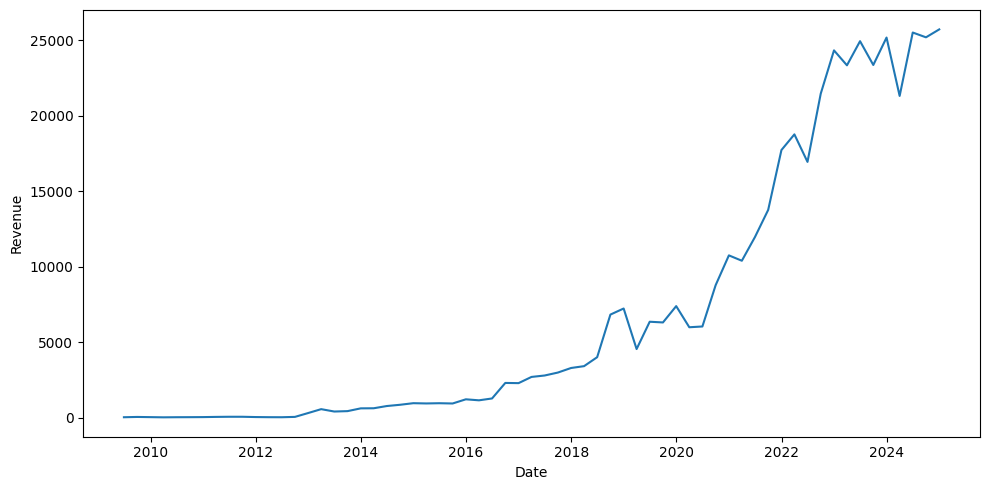

In [92]:
# 📌Importación de librerías
import matplotlib.pyplot as plt # Se usa para crear gráficos en Python.
import seaborn as sns # seaborn: Biblioteca basada en Matplotlib que facilita la visualización de datos.


# 📌Crear la figura y ejes
fig, axis = plt.subplots(figsize = (10, 5))
#    (-) plt.subplots(figsize=(10,5)): Crea una figura (fig) y un conjunto de ejes (axis).
#    (-) figsize=(10,5): Define el tamaño de la figura (10 pulgadas de ancho y 5 de alto).


# 📌Convertir los datos a tipos adecuados
df_tesla_revenue["Date"] = pd.to_datetime(df_tesla_revenue["Date"]) # Convierte la columna Date en formato datetime (necesario para gráficos de series de tiempo).
df_tesla_revenue["Revenue"] = df_tesla_revenue["Revenue"].astype('int') # Convierte la columna Revenue a tipo entero (por si tenía otro tipo de dato como str).


# 📌Crear la línea de tiempo
sns.lineplot(data = df_tesla_revenue, x = "Date", y = "Revenue")
#   (-) sns.lineplot(): Crea un gráfico de líneas con los datos de df_tesla_revenue.
#   (-) data = df_tesla_revenue: Especifica el DataFrame a usar.
#   (-) x = "Date": Eje X (fechas).
#   (-) y = "Revenue": Eje Y (ingresos).


# 📌Ajustar el diseño del gráfico
plt.tight_layout() # Ajusta automáticamente los márgenes para que no haya solapamientos.

# 📌Mostrar el gráfico
plt.show() # Muestra el gráfico generado.


# 📌En resumen, este codigo dibuja un gráfico de líneas donde:
#    (-) El eje X representa la fecha (Date).
#    (-) El eje Y representa los ingresos (Revenue).
#    (-) Se visualiza cómo han cambiado los ingresos de Tesla a lo largo del tiempo.

### 🧩 Anual Gross Benefit 

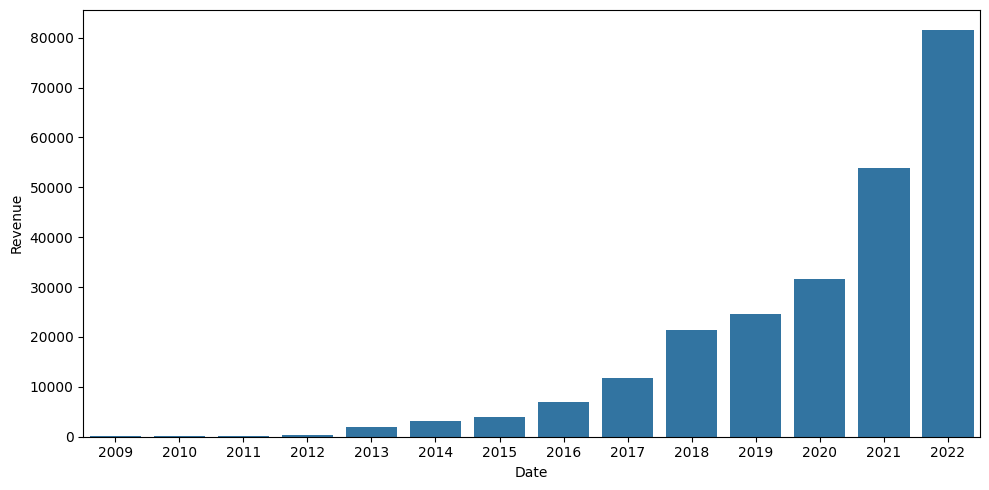

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5)) 
    # Crea la figura y el eje para el gráfico. 
    # figsize=(10, 5): Define el tamaño del gráfico.

df_tesla_revenue["Date"] = pd.to_datetime(df_tesla_revenue["Date"]) 
    #Convierte la columna "Date" a formato datetime.
    #Esto permite hacer operaciones de tiempo como agrupar por año.

df_tesla_revenue_yearly = df_tesla_revenue.groupby(df_tesla_revenue["Date"].dt.year)[["Revenue"]].sum().reset_index()
    # Agrupa los datos por año (df_tesla_revenue["Date"].dt.year).
    # Aplica .sum() para sumar los valores dentro de cada año.
    # [["Revenue"]]: Especifica que solo la columna "Revenue" debe sumarse, ignorando "Date".
    
sns.barplot(data = df_tesla_revenue_yearly[df_tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")
    # Filtra los datos para excluir los años 2023 en adelante.
    # Crea un gráfico de barras con Seaborn.

# Ajusta los márgenes del gráfico y lo muestra:
plt.tight_layout()
plt.show()



### 🧩Monthly gross benefit

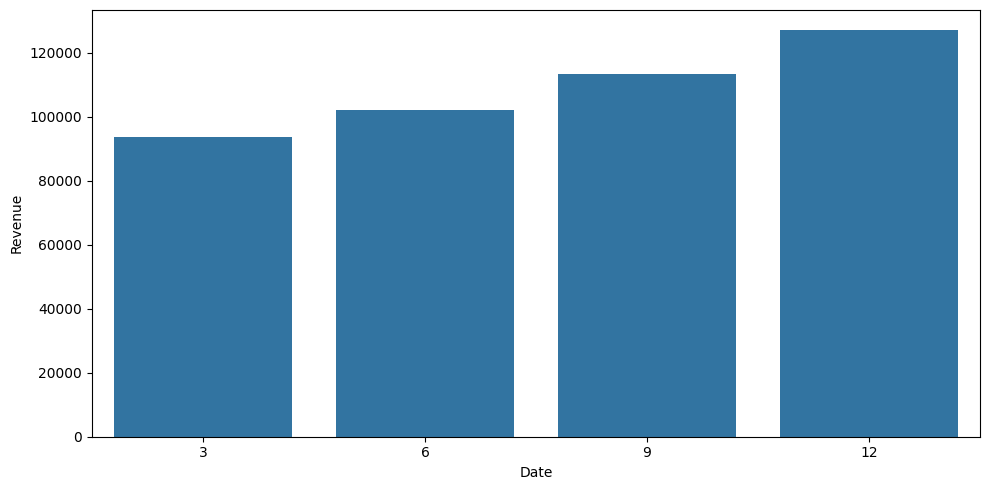

In [102]:
fig, axis = plt.subplots(figsize = (10, 5))
    # Crea la figura (fig) y el eje (axis) para el gráfico.
    # figsize=(10, 5): Define el tamaño del gráfico en pulgadas

df_tesla_revenue_monthly = df_tesla_revenue.groupby(df_tesla_revenue["Date"].dt.month)[["Revenue"]].sum().reset_index()
    #  df_tesla_revenue["Date"].dt.month → Extrae el número de mes de cada fecha.
    # .groupby(...) → Agrupa los datos por mes.
    # [["Revenue"]].sum() → Suma los ingresos (Revenue) de cada mes.
    # .reset_index() → Convierte el resultado en un DataFrame ordenado.
        # Aquí "Date" representa el número del mes (1 = enero, 2 = febrero, etc.).
                # Date    Revenue
                # 1	        50000
                # 2	        48000
                # 3	        52000
                # ...	      ...
                # 12	    60000


sns.barplot(data = df_tesla_revenue_monthly, x = "Date", y = "Revenue")
    # Crea un gráfico de barras con Seaborn.
    # x = "Date" → Ubica los meses en el eje X.
    # y = "Revenue" → Muestra los ingresos mensuales en el eje Y.

plt.tight_layout() # → Ajusta automáticamente el diseño para evitar solapamientos.

plt.show() # → Muestra el gráfico.